# A Tone Mapping Algorithm for High Contrast Images
### Ashikhmin, Michael 2002 


Tone mapping problem boils down to two components: (i) compressing the dynamic range and (2) preserving local details.




## Overview

....

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Tone Mapping function

## Local adaptation level

Human vision system is known to adjust to LOCAL luminance, $\rm{L}_a$, which in this study is defined as an average luminance over some neighboring pixel around position(x,y). Locallity of $\rm{L}_a$ is more important in HDR scene as human $\rm{L}_a$ my vary significantly over vastly different luminance.

https://en.wikipedia.org/wiki/Adaptation_(eye)

### Capacity function 
$C(L) = \int_{0}^{L}\frac{dl}{TVI(l)}$

### Simplified TVI (Threshold vs. Intensity) function

Human TVI of rod and cone vision are different. 
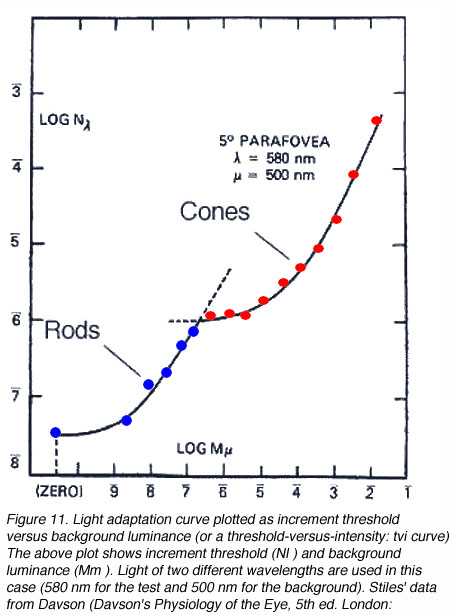

Ashikmin approximates TVI as follows.

In [5]:
def approx_tvi(l):
    conditions=[l < 0.0034,
                  (0.0034 <= l) * (l < 1),
                  (1 <= l) * (l < 7.2444),
                  7.2444 <= l]
    functions=[l/0.0014,
               2.4483+np.log10(l/0.0034)/0.4027,
               16.563 + (l-1)/0.4027,
               32.0693 + np.log10(l/7.2444)/0.0556]
    return np.piecewise(l, conditions, functions)

In [7]:
for l in ll:
    print(approx_tvi(l))

0.7142857142857143
6.311223934769126
7.054331452734525
7.490130062894027
7.799642978472596
8.039849543114787
8.236179281151886
8.402212515507905
8.546061612574695
16.791006411269386
17.091979890787687
17.39295337030599
17.69392684982429
17.99490032934259
18.295873808860897
18.596847288379198
18.8978207678975
19.1987942474158
19.499767726934103
19.800741206452404
20.101714685970705
20.40268816548901
20.703661645007312
21.004635124525613
21.305608604043915
21.606582083562216
21.907555563080518
22.20852904259882
22.509502522117124
22.810476001635426
23.111449481153727
23.41242296067203
23.71339644019033
24.014369919708635
24.315343399226936
24.616316878745238
24.91729035826354
25.21826383778184
25.519237317300146
25.820210796818444
26.12118427633675
26.42215775585505
26.72313123537335
27.024104714891656
27.325078194409954
27.62605167392826
27.92702515344656
28.227998632964862
28.528972112483164
28.829945592001465
29.13091907151977
29.431892551038068
29.732866030556373
30.033839510074674
3

In [6]:
ll = np.linspace(0.001, 12, 100)
plt.plot(ll, approx_tvi(ll))
plt.show()

ValueError: NumPy boolean array indexing assignment cannot assign 100 input values to the 1 output values where the mask is true